# Real and Fake News Analysis

# Clean Data

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import string
import keras
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

We have two seperate data sets. One of them is true news set and the other one is fake news set without labels

In [2]:
datasetTrue = pd.read_csv("True.csv")
datasetFalse = pd.read_csv("Fake.csv")


After the labelize data sets, combined them with pd.concat

In [ ]:
datasetTrue["label"] = 1
datasetFalse["label"] = 0
dataSet = pd.concat([datasetTrue , datasetFalse] , ignore_index=True)

In [ ]:
Delete irrevelant columns 

In [3]:
del dataSet["date"]
del dataSet["subject"]


In [4]:
titleAndTextColumn = dataSet.iloc[:,0:2]
labelColumn = dataSet.iloc[:,2]

labelDF = pd.DataFrame(data = labelColumn)

Use nltk library to eliminate unnecessary words.

In [5]:
nltk.download('stopwords')
stopwords = set(stopwords.words("english"))
punctuation = list(string.punctuation)
stopwords.update(punctuation)
porterStemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Define a function as cleanText. It will detected punctuations, numbers and other necessary thing. Lower every letter in the words to analyze correctly.

In [6]:
LINECOUNT = len(dataSet)

def cleanText(text):
    newText = []
    text = text.lower()
    text = re.sub('[^a-zA-Z]' , " " , text)
    
    for i in text.split():
        if i.strip() not in stopwords:
            newText.append(i.strip())
    
    return " ".join(newText)

array = []

for i in range(0 , LINECOUNT):
    titleText = cleanText(dataSet["title"][i])
    textText = cleanText(dataSet["text"][i])
    text = titleText + " " + textText
    array.append(text)

In [7]:
countVectorizer = CountVectorizer(max_features=5000)

X = countVectorizer.fit_transform(array).toarray()
Y = labelDF.values
  
x_train, x_test , y_train , y_test = train_test_split(X , Y ,test_size=0.25 , random_state=0)

# Deep Learning

In [8]:
from keras.models import Sequential
from keras.layers import Dense

Create a machine learning model. I use relu activation for first two layers and output-layer activation method is sigmoid

In [9]:
EPOCH = 5

classifier = Sequential()
classifier.add(Dense(1500 , activation = "relu" , input_dim = 5000 , name = "input-layer"))
classifier.add(Dense(1500 , activation = "relu"  , name = "hidder-layer" ))
classifier.add(Dense(1 , activation = "sigmoid" , name = "output-layer"))

I use binary methods because the output will be true or false

In [10]:
classifier.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics=['binary_accuracy'] )

classifier.fit(x_train , y_train , epochs=EPOCH)

predictions = classifier.predict(x_test)
predictions = (predictions > 0.5)

Epoch 1/5
1053/1053 [==============================] - 46s 44ms/step - loss: 0.0614 - binary_accuracy: 0.9822
Epoch 2/5
1053/1053 [==============================] - 46s 44ms/step - loss: 0.0164 - binary_accuracy: 0.9967
Epoch 3/5
1053/1053 [==============================] - 46s 43ms/step - loss: 0.0064 - binary_accuracy: 0.9985
Epoch 4/5
1053/1053 [==============================] - 46s 43ms/step - loss: 0.0077 - binary_accuracy: 0.9980
Epoch 5/5
1053/1053 [==============================] - 46s 43ms/step - loss: 0.0040 - binary_accuracy: 0.9988


Visualize to understand better.

In [13]:
confusionMatrix = confusion_matrix(y_test , predictions)

truePred  = confusionMatrix[0,0] + confusionMatrix[1,1]
falsePred = confusionMatrix[0,1] + confusionMatrix [1,0]

print(confusionMatrix)

[[5819   39]
 [  38 5329]]


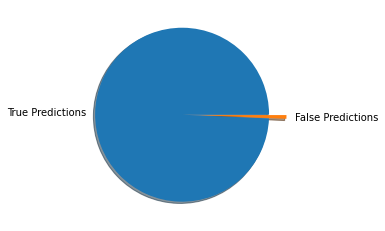

In [14]:
pieChart = np.array([truePred , falsePred])
label = ["True Predictions" , "False Predictions"]
explode = [0.2 , 0.0]

plt.pie(pieChart , labels= label , shadow=True , explode = explode)
plt.show()